# Roads Distance Visualization for Albania Wildfire Dataset

This notebook visualizes the `roads_distance` variable across all wildfire samples in the Albania 2022 dataset.

In [5]:
# Import required libraries
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load All NetCDF Files

In [6]:
# Define the data directory
data_dir = Path('../data/raw/dataset_64_64_all_10days_final/2022/Albania')

# Get all .nc files
nc_files = sorted(list(data_dir.glob('*.nc')))

print(f"Found {len(nc_files)} NetCDF files")
print(f"\nFirst 5 files:")
for f in nc_files[:5]:
    print(f"  - {f.name}")

Found 34 NetCDF files

First 5 files:
  - corrected_sample_10067.nc
  - corrected_sample_10069.nc
  - corrected_sample_10076.nc
  - corrected_sample_10078.nc
  - corrected_sample_10085.nc


## 2. Visualize Roads Distance for All Samples

Create a grid visualization showing the roads_distance variable for all wildfire samples.

Loading and plotting roads_distance for all samples...


Processing files: 100%|██████████| 34/34 [00:00<00:00, 104.25it/s]


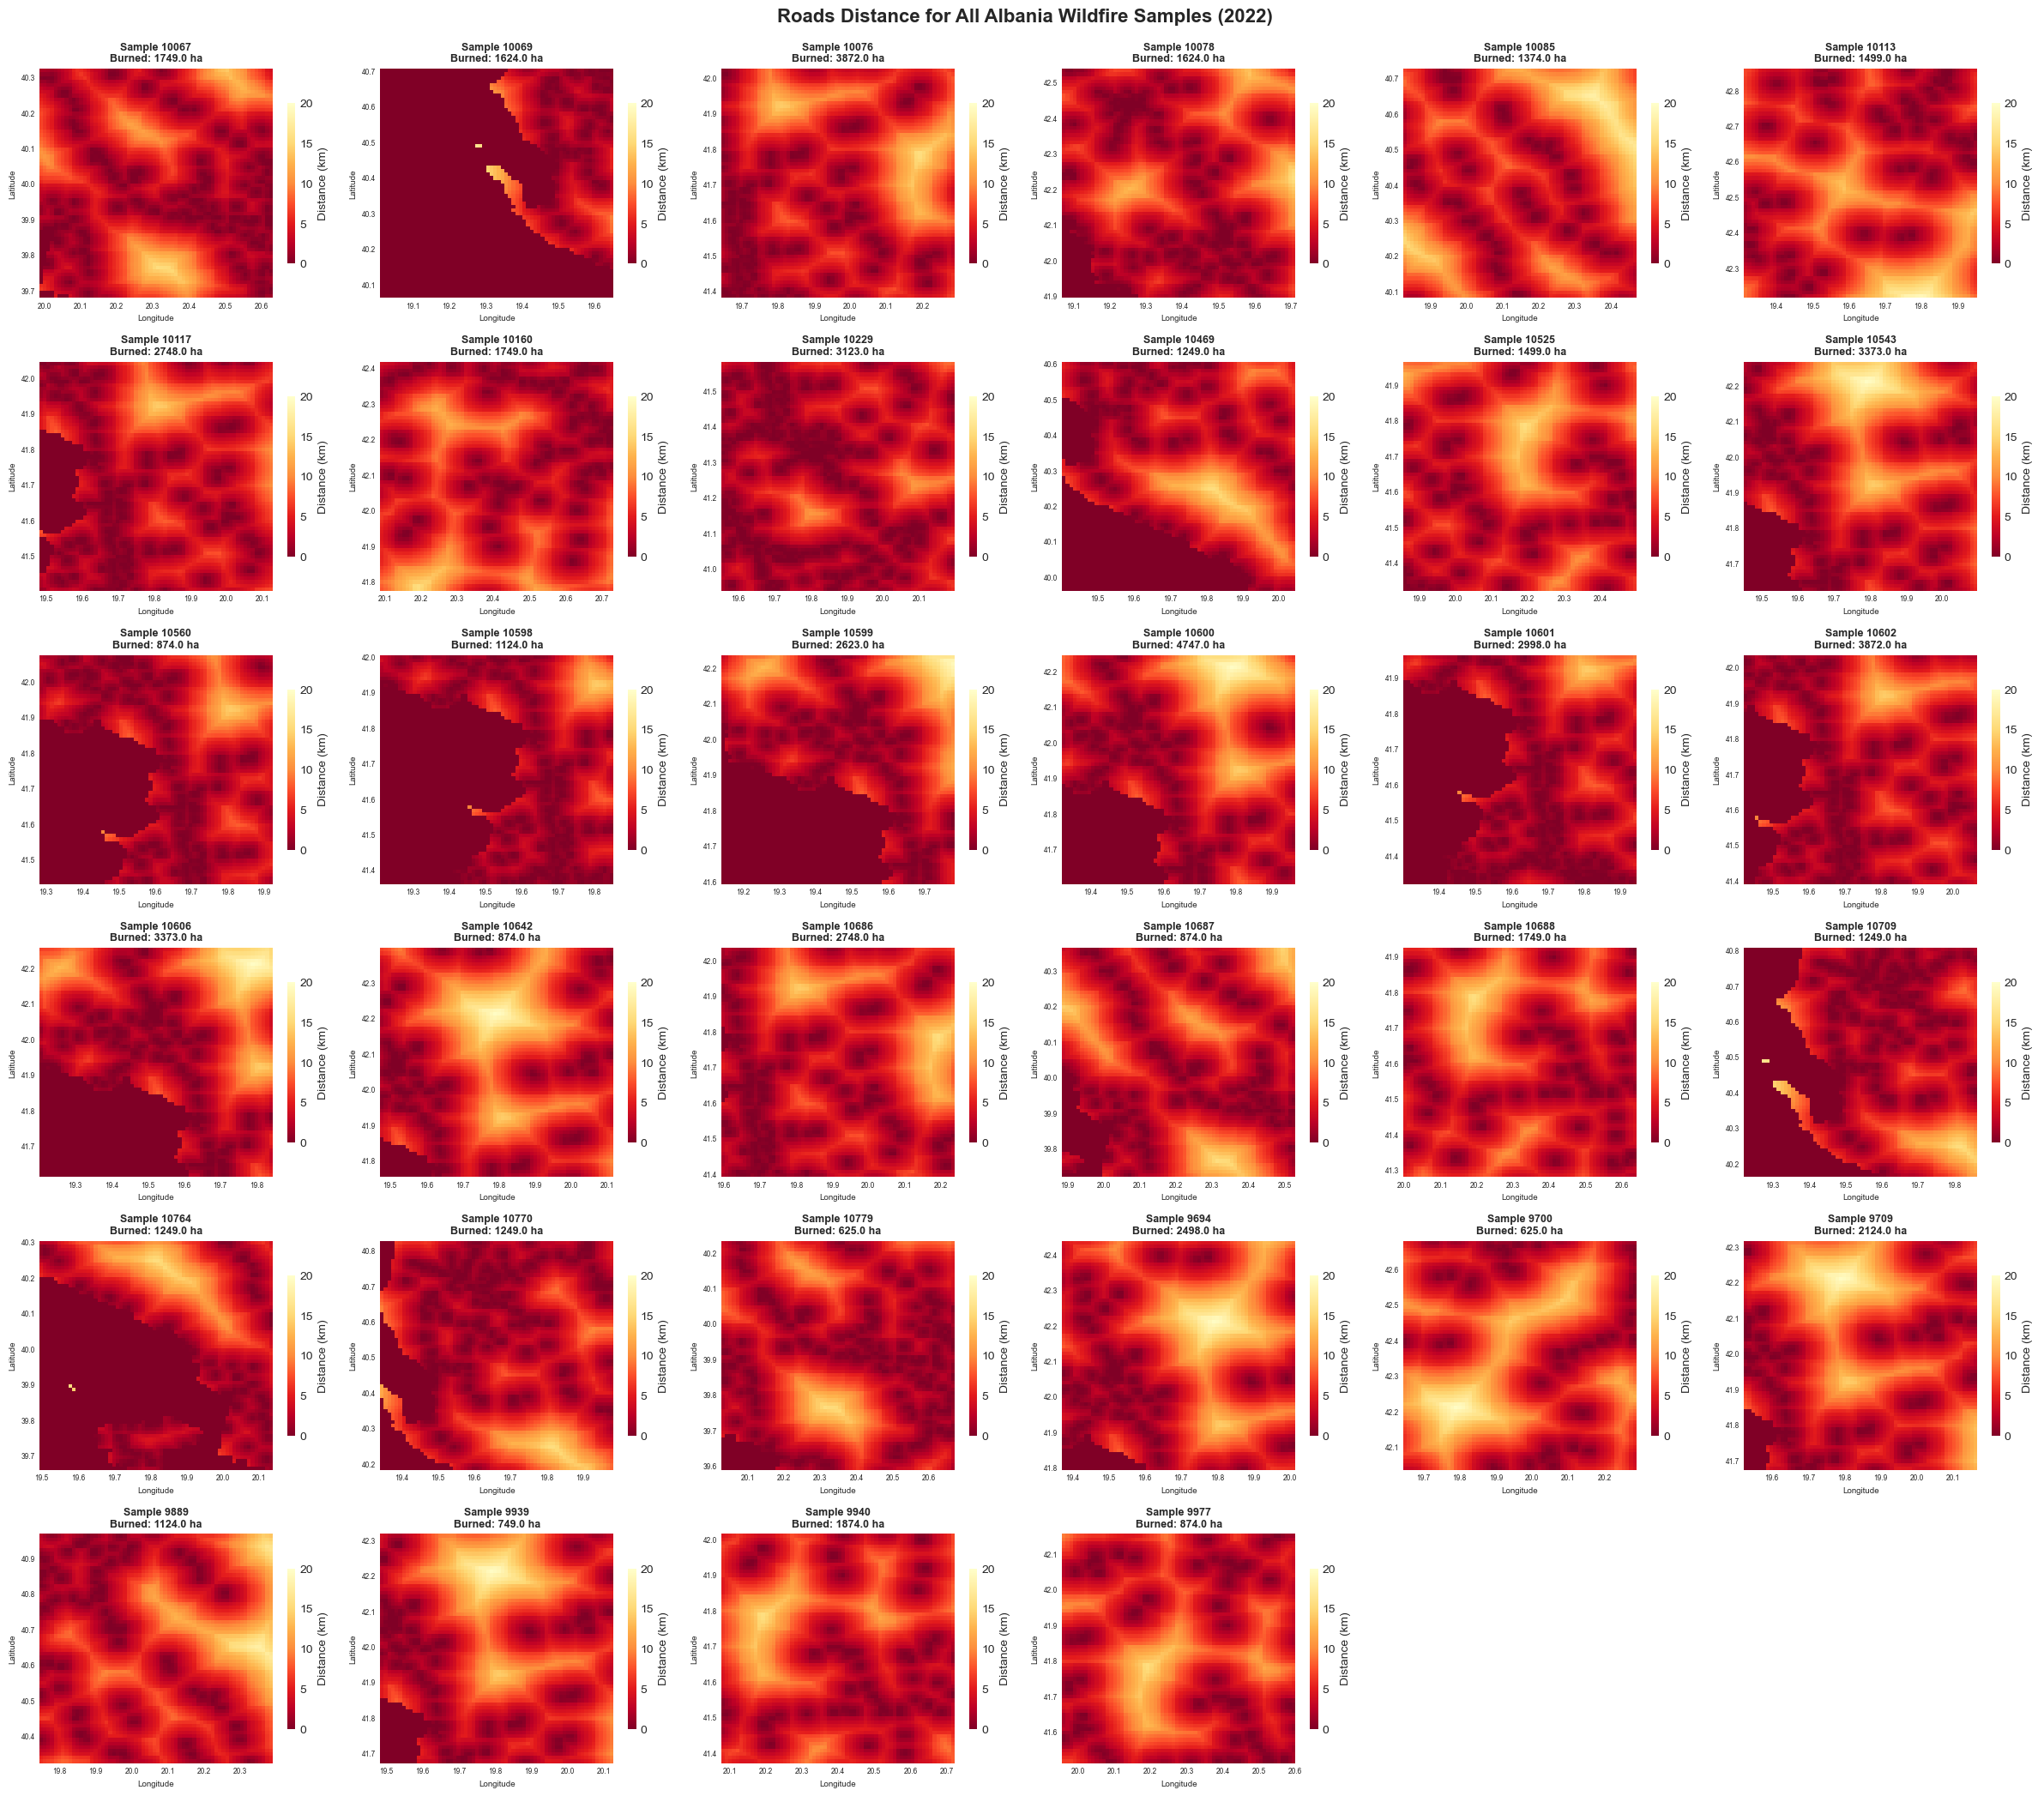


Visualization complete!


In [7]:
# Calculate grid dimensions
n_files = len(nc_files)
n_cols = 6
n_rows = (n_files + n_cols - 1) // n_cols

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows*3.5))
axes = axes.flatten()

print("Loading and plotting roads_distance for all samples...")

# Load and plot each file
for idx, nc_file in enumerate(tqdm(nc_files, desc="Processing files")):
    ax = axes[idx]
    
    try:
        # Load dataset
        ds = xr.open_dataset(nc_file)
        
        # Plot roads_distance
        im = ds['roads_distance'].plot(
            ax=ax, 
            cmap='YlOrRd_r',  # Yellow to Red, reversed (closer roads = darker)
            add_colorbar=True,
            cbar_kwargs={'shrink': 0.7, 'label': 'Distance (km)'},
            vmin=0,
            vmax=20
        )
        
        # Extract sample number from filename
        sample_num = nc_file.stem.split('_')[-1]
        
        # Get metadata if available
        burned_area = ds.attrs.get('burned_area_ha', 'N/A')
        date = ds.attrs.get('date', 'N/A')
        
        ax.set_title(f'Sample {sample_num}\nBurned: {burned_area} ha', 
                     fontsize=9, fontweight='bold')
        ax.set_xlabel('Longitude', fontsize=7)
        ax.set_ylabel('Latitude', fontsize=7)
        ax.tick_params(labelsize=6)
        
        # Close dataset to free memory
        ds.close()
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Error loading\n{nc_file.name}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])

# Hide unused subplots
for idx in range(n_files, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Roads Distance for All Albania Wildfire Samples (2022)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nVisualization complete!")

## 3. Statistical Analysis of Roads Distance

In [8]:
# Collect statistics for roads_distance across all samples
stats_data = []

print("Collecting statistics...")

for nc_file in tqdm(nc_files, desc="Processing files"):
    try:
        ds = xr.open_dataset(nc_file)
        
        roads_dist = ds['roads_distance']
        sample_num = nc_file.stem.split('_')[-1]
        
        stats_data.append({
            'sample': sample_num,
            'filename': nc_file.name,
            'min_distance': float(roads_dist.min().values),
            'max_distance': float(roads_dist.max().values),
            'mean_distance': float(roads_dist.mean().values),
            'median_distance': float(np.median(roads_dist.values)),
            'std_distance': float(roads_dist.std().values),
            'burned_area_ha': ds.attrs.get('burned_area_ha', np.nan),
            'date': ds.attrs.get('date', 'N/A')
        })
        
        ds.close()
        
    except Exception as e:
        print(f"Error processing {nc_file.name}: {e}")

# Create DataFrame
df_stats = pd.DataFrame(stats_data)

print("\n" + "="*80)
print("ROADS DISTANCE STATISTICS ACROSS ALL SAMPLES")
print("="*80)
print(f"\nTotal samples: {len(df_stats)}")
print(f"\nOverall Statistics:")
print(df_stats[['min_distance', 'max_distance', 'mean_distance', 'median_distance', 'std_distance']].describe())

# Display the dataframe
print("\n" + "="*80)
print("DETAILED STATISTICS BY SAMPLE")
print("="*80)
display(df_stats)

Processing files: 100%|██████████| 34/34 [00:00<00:00, 196.73it/s]


ROADS DISTANCE STATISTICS ACROSS ALL SAMPLES

Total samples: 34

Overall Statistics:
       min_distance  max_distance  mean_distance  median_distance  \
count          34.0     34.000000      34.000000        34.000000   
mean            0.0     16.531147       4.058719         3.215206   
std             0.0      2.195905       1.343712         1.545766   
min             0.0     10.780000       0.932021         0.000000   
25%             0.0     15.548000       3.035724         2.301875   
50%             0.0     15.603000       4.209610         3.321000   
75%             0.0     18.920750       4.941593         4.377625   
max             0.0     19.518999       6.535196         6.084500   

       std_distance  
count     34.000000  
mean       3.396346  
std        0.585804  
min        2.017979  
25%        3.171264  
50%        3.342052  
75%        3.877472  
max        4.252683  

DETAILED STATISTICS BY SAMPLE


,sample,filename,min_distance,max_distance,mean_distance,median_distance,std_distance,burned_area_ha,date
0,10067,corrected_sample_10067.nc,0.0,15.548000,4.114933,3.2015,3.350711,1749.0,2022-07-17
1,10069,corrected_sample_10069.nc,0.0,16.521000,0.932021,0.0000,2.017979,1624.0,2022-09-08
2,10076,corrected_sample_10076.nc,0.0,15.603000,4.737613,4.1460,3.392370,3872.0,2022-08-01
3,10078,corrected_sample_10078.nc,0.0,15.551000,3.890059,3.1790,3.171924,1624.0,2022-07-24
4,10085,corrected_sample_10085.nc,0.0,17.711000,6.022348,5.2270,3.951205,1374.0,2022-07-29
5,10113,corrected_sample_10113.nc,0.0,18.868999,5.261195,4.6915,3.547448,1499.0,2022-03-25
6,10117,corrected_sample_10117.nc,0.0,14.184000,3.389076,2.8335,2.835458,2748.0,2022-03-23
7,10160,corrected_sample_10160.nc,0.0,15.603000,4.518599,4.0490,3.070068,1749.0,2022-03-19
8,10229,corrected_sample_10229.nc,0.0,10.780000,2.775166,2.3540,2.250249,3123.0,2022-03-23
9,10469,corrected_sample_10469.nc,0.0,15.479000,3.431362,2.5390,3.523575,1249.0,2022-07-10


## 3.5. Temporal Coverage Analysis

Analyze the date ranges covered across all wildfire samples.

In [12]:
# Collect temporal information from all files
temporal_data = []

print("Analyzing temporal coverage across all samples...")
print("="*80)

for nc_file in tqdm(nc_files, desc="Processing files"):
    try:
        ds = xr.open_dataset(nc_file)

        sample_num = nc_file.stem.split('_')[-1]

        # Get the fire date from metadata
        fire_date = ds.attrs.get('date', None)

        # Get the time dimension data
        if 'time' in ds.dims:
            time_values = ds.time.values
            first_timestep = pd.to_datetime(time_values[0])
            last_timestep = pd.to_datetime(time_values[-1])
            n_timesteps = len(time_values)

            temporal_data.append({
                'sample': sample_num,
                'fire_date': fire_date,
                'first_timestep': first_timestep,
                'last_timestep': last_timestep,
                'n_timesteps': n_timesteps,
                'duration_days': (last_timestep - first_timestep).days,
                'burned_area_ha': ds.attrs.get('burned_area_ha', np.nan)
            })

        ds.close()

    except Exception as e:
        print(f"Error processing {nc_file.name}: {e}")

# Create DataFrame
df_temporal = pd.DataFrame(temporal_data)

# Convert fire_date to datetime
df_temporal['fire_date_dt'] = pd.to_datetime(df_temporal['fire_date'])

print("\n" + "="*80)
print("TEMPORAL COVERAGE SUMMARY")
print("="*80)
print(f"\nTotal samples analyzed: {len(df_temporal)}")
print(f"Number of timesteps per sample: {df_temporal['n_timesteps'].iloc[0]}")
print(f"Duration covered per sample: {df_temporal['duration_days'].iloc[0]} days")

print(f"\n" + "="*80)
print("DATE RANGE ACROSS ALL SAMPLES")
print("="*80)
print(f"\nFire Event Dates (from metadata):")
print(f"  Earliest fire date: {df_temporal['fire_date_dt'].min().strftime('%Y-%m-%d')}")
print(f"  Latest fire date:   {df_temporal['fire_date_dt'].max().strftime('%Y-%m-%d')}")
print(f"  Total span:         {(df_temporal['fire_date_dt'].max() - df_temporal['fire_date_dt'].min()).days} days")

print(f"\n" + "="*80)
print("TIMESTEP RANGES (INCLUDING PRE/POST FIRE DAYS)")
print("="*80)
print(f"\nFirst Timesteps:")
print(f"  Earliest: {df_temporal['first_timestep'].min().strftime('%Y-%m-%d')}")
print(f"  Latest:   {df_temporal['first_timestep'].max().strftime('%Y-%m-%d')}")

print(f"\nLast Timesteps:")
print(f"  Earliest: {df_temporal['last_timestep'].min().strftime('%Y-%m-%d')}")
print(f"  Latest:   {df_temporal['last_timestep'].max().strftime('%Y-%m-%d')}")

print(f"\nOverall temporal coverage:")
print(f"  From: {df_temporal['first_timestep'].min().strftime('%Y-%m-%d')}")
print(f"  To:   {df_temporal['last_timestep'].max().strftime('%Y-%m-%d')}")
print(f"  Total span: {(df_temporal['last_timestep'].max() - df_temporal['first_timestep'].min()).days} days")

print("\n" + "="*80)
print("MONTHLY DISTRIBUTION OF FIRE EVENTS")
print("="*80)
monthly_counts = df_temporal.groupby(df_temporal['fire_date_dt'].dt.to_period('M')).size()
print(monthly_counts.to_string())

# Display full temporal data
print("\n" + "="*80)
print("DETAILED TEMPORAL DATA BY SAMPLE")
print("="*80)
df_temporal_display = df_temporal.copy()
df_temporal_display['first_timestep'] = df_temporal_display['first_timestep'].dt.strftime('%Y-%m-%d')
df_temporal_display['last_timestep'] = df_temporal_display['last_timestep'].dt.strftime('%Y-%m-%d')
display(df_temporal_display[['sample', 'fire_date', 'first_timestep', 'last_timestep',
                              'n_timesteps', 'duration_days', 'burned_area_ha']])

Analyzing temporal coverage across all samples...


Processing files: 100%|██████████| 34/34 [00:00<00:00, 189.47it/s]


TEMPORAL COVERAGE SUMMARY

Total samples analyzed: 34
Number of timesteps per sample: 10
Duration covered per sample: 9 days

DATE RANGE ACROSS ALL SAMPLES

Fire Event Dates (from metadata):
  Earliest fire date: 2022-03-19
  Latest fire date:   2022-09-24
  Total span:         189 days

TIMESTEP RANGES (INCLUDING PRE/POST FIRE DAYS)

First Timesteps:
  Earliest: 2022-03-15
  Latest:   2022-09-20

Last Timesteps:
  Earliest: 2022-03-24
  Latest:   2022-09-29

Overall temporal coverage:
  From: 2022-03-15
  To:   2022-09-29
  Total span: 198 days

MONTHLY DISTRIBUTION OF FIRE EVENTS
fire_date_dt
2022-03    11
2022-07     6
2022-08    13
2022-09     4
Freq: M

DETAILED TEMPORAL DATA BY SAMPLE


,sample,fire_date,first_timestep,last_timestep,n_timesteps,duration_days,burned_area_ha
0,10067,2022-07-17,2022-07-13,2022-07-22,10,9,1749.0
1,10069,2022-09-08,2022-09-04,2022-09-13,10,9,1624.0
2,10076,2022-08-01,2022-07-28,2022-08-06,10,9,3872.0
3,10078,2022-07-24,2022-07-20,2022-07-29,10,9,1624.0
4,10085,2022-07-29,2022-07-25,2022-08-03,10,9,1374.0
5,10113,2022-03-25,2022-03-21,2022-03-30,10,9,1499.0
6,10117,2022-03-23,2022-03-19,2022-03-28,10,9,2748.0
7,10160,2022-03-19,2022-03-15,2022-03-24,10,9,1749.0
8,10229,2022-03-23,2022-03-19,2022-03-28,10,9,3123.0
9,10469,2022-07-10,2022-07-06,2022-07-15,10,9,1249.0


## 4. Distribution Analysis

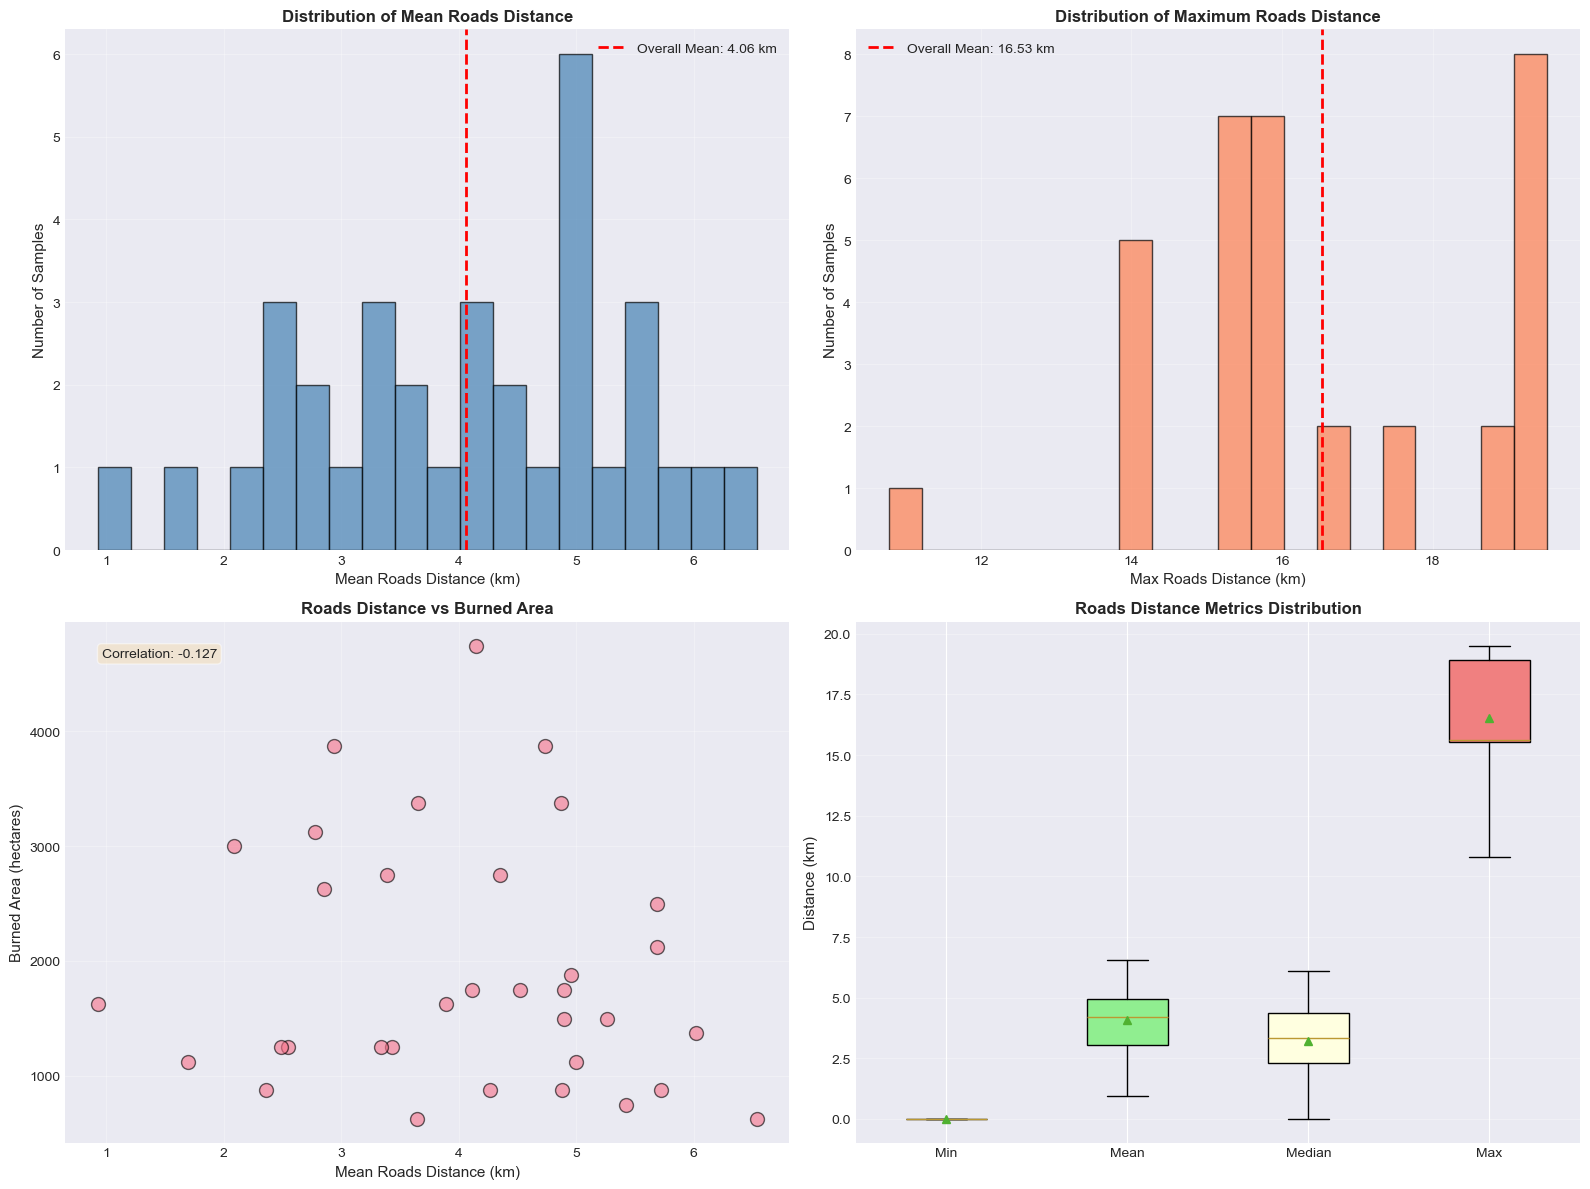

In [9]:
# Create distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Mean distance distribution
ax = axes[0, 0]
ax.hist(df_stats['mean_distance'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax.axvline(df_stats['mean_distance'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Overall Mean: {df_stats["mean_distance"].mean():.2f} km')
ax.set_xlabel('Mean Roads Distance (km)', fontsize=11)
ax.set_ylabel('Number of Samples', fontsize=11)
ax.set_title('Distribution of Mean Roads Distance', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Max distance distribution
ax = axes[0, 1]
ax.hist(df_stats['max_distance'], bins=20, edgecolor='black', alpha=0.7, color='coral')
ax.axvline(df_stats['max_distance'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Overall Mean: {df_stats["max_distance"].mean():.2f} km')
ax.set_xlabel('Max Roads Distance (km)', fontsize=11)
ax.set_ylabel('Number of Samples', fontsize=11)
ax.set_title('Distribution of Maximum Roads Distance', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Relationship between mean distance and burned area
ax = axes[1, 0]
ax.scatter(df_stats['mean_distance'], df_stats['burned_area_ha'], 
           alpha=0.6, s=100, edgecolors='black', linewidths=1)
ax.set_xlabel('Mean Roads Distance (km)', fontsize=11)
ax.set_ylabel('Burned Area (hectares)', fontsize=11)
ax.set_title('Roads Distance vs Burned Area', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = df_stats[['mean_distance', 'burned_area_ha']].corr().iloc[0, 1]
ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
        transform=ax.transAxes, fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        verticalalignment='top')

# Plot 4: Box plot of distance metrics
ax = axes[1, 1]
box_data = [df_stats['min_distance'], df_stats['mean_distance'], 
            df_stats['median_distance'], df_stats['max_distance']]
bp = ax.boxplot(box_data, labels=['Min', 'Mean', 'Median', 'Max'], 
                patch_artist=True, showmeans=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Distance (km)', fontsize=11)
ax.set_title('Roads Distance Metrics Distribution', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. Top/Bottom Samples by Mean Roads Distance

In [10]:
# Sort by mean distance
df_sorted = df_stats.sort_values('mean_distance', ascending=False)

print("="*80)
print("TOP 10 SAMPLES - FARTHEST FROM ROADS (Most Remote)")
print("="*80)
display(df_sorted.head(10)[['sample', 'mean_distance', 'max_distance', 'burned_area_ha', 'date']])

print("\n" + "="*80)
print("BOTTOM 10 SAMPLES - CLOSEST TO ROADS (Least Remote)")
print("="*80)
display(df_sorted.tail(10)[['sample', 'mean_distance', 'max_distance', 'burned_area_ha', 'date']])

TOP 10 SAMPLES - FARTHEST FROM ROADS (Most Remote)


,sample,mean_distance,max_distance,burned_area_ha,date
28,9700,6.535196,19.518999,625.0,2022-03-25
4,10085,6.022348,17.711000,1374.0,2022-07-29
19,10642,5.719929,19.518999,874.0,2022-08-08
27,9694,5.690015,19.518999,2498.0,2022-03-21
29,9709,5.686784,19.518999,2124.0,2022-03-22
31,9939,5.427081,19.518999,749.0,2022-03-24
5,10113,5.261195,18.868999,1499.0,2022-03-25
30,9889,4.995400,17.711000,1124.0,2022-03-22
32,9940,4.956804,15.603000,1874.0,2022-03-23
22,10688,4.895962,15.603000,1749.0,2022-08-05



BOTTOM 10 SAMPLES - CLOSEST TO ROADS (Least Remote)


,sample,mean_distance,max_distance,burned_area_ha,date
25,10770,3.334817,15.479,1249.0,2022-09-14
17,10602,2.936026,14.184,3872.0,2022-08-01
14,10599,2.852348,18.938,2623.0,2022-08-07
8,10229,2.775166,10.780,3123.0,2022-03-23
23,10709,2.546432,16.521,1249.0,2022-08-07
24,10764,2.485605,15.562,1249.0,2022-09-12
12,10560,2.362966,14.184,874.0,2022-08-02
16,10601,2.089831,14.184,2998.0,2022-08-06
13,10598,1.693117,14.184,1124.0,2022-08-07
1,10069,0.932021,16.521,1624.0,2022-09-08


## 6. Export Results

In [11]:
# Save statistics to CSV
output_path = '../data/processed/roads_distance_statistics.csv'
df_stats.to_csv(output_path, index=False)
print(f"Statistics saved to: {output_path}")

# Save summary statistics
summary_stats = df_stats[['min_distance', 'max_distance', 'mean_distance', 
                          'median_distance', 'std_distance']].describe()
summary_output = '../data/processed/roads_distance_summary.csv'
summary_stats.to_csv(summary_output)
print(f"Summary statistics saved to: {summary_output}")

Statistics saved to: ../data/processed/roads_distance_statistics.csv
Summary statistics saved to: ../data/processed/roads_distance_summary.csv


## 7. Key Insights

### What does roads_distance tell us?

The `roads_distance` variable represents the distance from each grid cell to the nearest road. This is important for wildfire analysis because:

1. **Accessibility for firefighting**: Areas closer to roads are typically easier for firefighters to access
2. **Human-caused ignitions**: Many wildfires start near roads due to human activity
3. **Evacuation planning**: Roads distance affects evacuation routes and response times
4. **Fire spread patterns**: Remote areas (far from roads) may experience different fire behavior

### Analysis Notes:
- Lower values (darker colors in visualization) = closer to roads
- Higher values (lighter colors) = more remote areas
- The correlation with burned area can indicate if remoteness affects fire size